In [10]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("titanic/train.csv")
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def preprocess(df):
    df = df.copy()

    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])

    def ticket_number(x):
        return x.split(" ")[-1]

    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])

    df["Name"] = df["Name"].apply(normalize_name)
    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)
    return df

preprocessed_train_df = preprocess(train_df)
#preprocessed_serving_df = preprocess(serving_df)

preprocessed_train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S,113803,NONE
4,5,0,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,373450,NONE


In [4]:
# Remove features we don't want to use
# PassengerId is self defined
# Ticket is split into two features
# Survived is the output
input_features = list(preprocessed_train_df.columns)
unwanted_features = ['Ticket', 'PassengerId', 'Survived']

for feature in unwanted_features:
    input_features.remove(feature)

print(f"Input features: {input_features}")

Input features: ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Ticket_number', 'Ticket_item']


In [12]:
# Split into X and y for input and output
X = preprocessed_train_df[input_features]
y = preprocessed_train_df['Survived']
print(X.head(5))
print(y.head(5))

features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(preprocessed_train_df[features])


   Pclass                                             Name     Sex   Age  \
0       3                            Braund Mr Owen Harris    male  22.0   
1       1  Cumings Mrs John Bradley Florence Briggs Thayer  female  38.0   
2       3                             Heikkinen Miss Laina  female  26.0   
3       1         Futrelle Mrs Jacques Heath Lily May Peel  female  35.0   
4       3                           Allen Mr William Henry    male  35.0   

   SibSp  Parch     Fare Cabin Embarked Ticket_number Ticket_item  
0      1      0   7.2500   NaN        S         21171         A/5  
1      1      0  71.2833   C85        C         17599          PC  
2      0      0   7.9250   NaN        S       3101282    STON/O2.  
3      1      0  53.1000  C123        S        113803        NONE  
4      0      0   8.0500   NaN        S        373450        NONE  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")


In [18]:
# Evaluate Model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8258
Test Accuracy: 0.7709


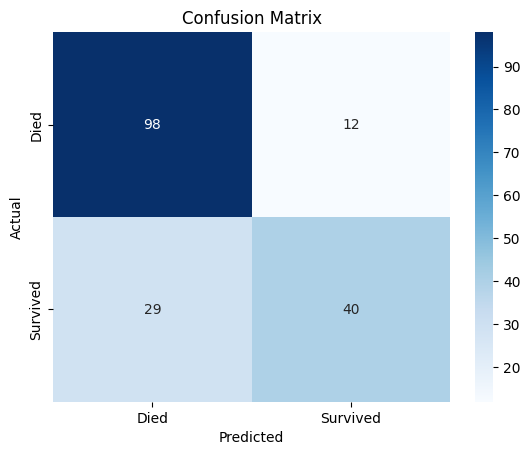

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
# print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Classification Report for Test Set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=['Died (0)', 'Survived (1)']))


Classification Report (Test Set):
              precision    recall  f1-score   support

    Died (0)       0.77      0.89      0.83       110
Survived (1)       0.77      0.58      0.66        69

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.74       179
weighted avg       0.77      0.77      0.76       179

